<a href="https://colab.research.google.com/github/karanjogi/Kaggle/blob/master/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
df = pd.read_csv('/content/train.csv', index_col='PassengerId')

In [106]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [0]:
df.drop(['Name', 'Cabin', 'Ticket'], axis=1, inplace=True)

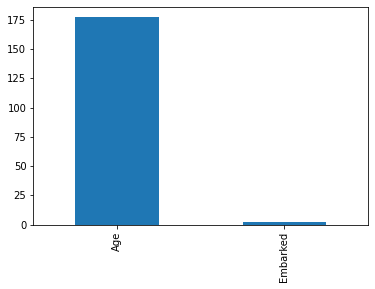

In [109]:
missing = df.isna().sum()
missing = missing[missing > 0]
missing.plot.bar()

In [0]:
X, y = df.drop('Survived', axis=1), df['Survived']
numeric = [c for c in X.columns if X[c].dtypes != 'object']
categorical = [c for c in X.columns if X[c].dtypes == 'object']

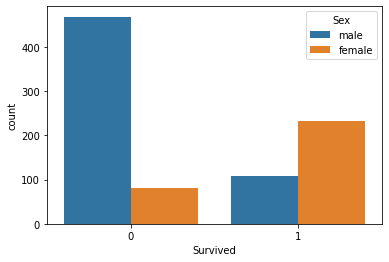

In [111]:
sns.countplot(y, hue='Sex', data=X)

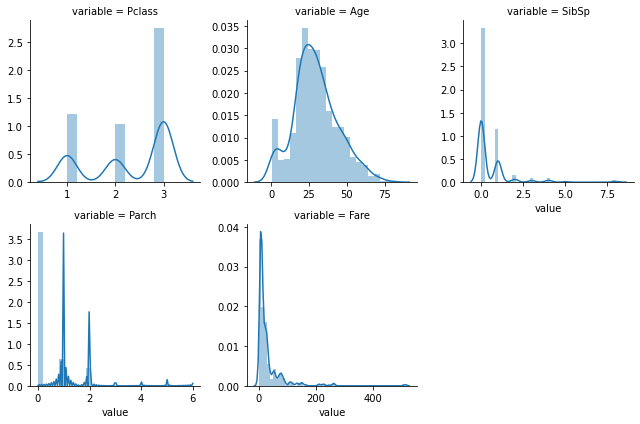

In [112]:
f = pd.melt(df, value_vars=numeric)
grid = sns.FacetGrid(f, col='variable', sharex=False, sharey=False, col_wrap=3)
grid.map(sns.distplot, "value")

In [113]:
X.nunique()

Pclass        3
Sex           2
Age          88
SibSp         7
Parch         7
Fare        248
Embarked      3
dtype: int64

In [114]:
X['Embarked'].value_counts(normalize=True)

S    0.724409
C    0.188976
Q    0.086614
Name: Embarked, dtype: float64

In [115]:
X['Fare'].head(10)

PassengerId
1      7.2500
2     71.2833
3      7.9250
4     53.1000
5      8.0500
6      8.4583
7     51.8625
8     21.0750
9     11.1333
10    30.0708
Name: Fare, dtype: float64

In [0]:
X['Sex'] = X['Sex'].map({'male':1,
                         'female':0})
X['Embarked'] = X['Embarked'].map({'S':0,
                                   'C':1,
                                   'Q':2})

In [117]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,1,22.0,1,0,7.2500,0.0
2,1,0,38.0,1,0,71.2833,1.0
3,3,0,26.0,0,0,7.9250,0.0
4,1,0,35.0,1,0,53.1000,0.0
5,3,1,35.0,0,0,8.0500,0.0


In [0]:
from sklearn.impute import KNNImputer

In [0]:
imputer = KNNImputer()

In [0]:
X = pd.DataFrame(np.round(imputer.fit_transform(X)), columns=X.columns)

In [121]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3.0,1.0,22.0,1.0,0.0,7.0,0.0
1,1.0,0.0,38.0,1.0,0.0,71.0,1.0
2,3.0,0.0,26.0,0.0,0.0,8.0,0.0
3,1.0,0.0,35.0,1.0,0.0,53.0,0.0
4,3.0,1.0,35.0,0.0,0.0,8.0,0.0


In [122]:
X.shape, y.shape

((891, 7), (891,))

In [0]:
from sklearn.manifold import t_sne
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.25, random_state=15, stratify=y)

In [0]:
from sklearn.tree import DecisionTreeClassifier

In [0]:
tree = DecisionTreeClassifier(random_state=15)

In [0]:
params = {'max_depth' : np.arange(2,11),
          'min_samples_leaf' : np.arange(2,11)}

In [0]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=15)

In [0]:
tree_2 = GridSearchCV(tree, param_grid=params, cv=skf, n_jobs=-1, verbose=1)

In [141]:
tree_2.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 398 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:    1.4s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=15, shuffle=True),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=15,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
            

In [142]:
tree_2.best_params_

{'max_depth': 9, 'min_samples_leaf': 4}

In [143]:
tree_2.best_score_

0.8307934014139826

In [0]:
pred_valid_2 = tree_2.best_estimator_.predict(X_holdout)

In [163]:
accuracy_score(pred_valid_2, y_holdout)

0.8251121076233184

In [0]:
df_test = pd.read_csv('/content/test.csv', index_col='PassengerId')

In [152]:
df_test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [0]:
df_test.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [154]:
df_test.isna().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [0]:
df_test['Sex'] = df_test['Sex'].map({'male':0,
                                     'female':1})
df_test['Embarked'] = df_test['Embarked'].map({'S':0,
                                               'C':1,
                                               'Q':2})

In [0]:
X_valid = pd.DataFrame(np.round(imputer.fit_transform(df_test)), columns=df_test.columns)

In [160]:
X_valid.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [161]:
X_valid.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,2.265550,0.363636,30.107656,0.447368,0.392344,35.614833,0.464115
std,0.841838,0.481622,12.993649,0.896760,0.981429,55.841051,0.685516
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,22.000000,0.000000,0.000000,8.000000,0.000000
50%,3.000000,0.000000,27.000000,0.000000,0.000000,14.000000,0.000000
75%,3.000000,1.000000,37.000000,1.000000,0.000000,31.750000,1.000000
max,3.000000,1.000000,76.000000,8.000000,9.000000,512.000000,2.000000


In [0]:
predictions = tree_2.best_estimator_.predict(X_valid)